In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import plot_tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

data = pd.read_csv('ml_lca_data_variable.csv')

# extract the independent variables (X) and dependent variable (y)
X = data[['COAL, Thousand Short Tons', 'NATURALGAS, Billion Cubic Feet', 'ELECTRICITY, Million Kilowatthours',
         'PETRO_INDUSTRIAL, Thousand Barrels per Day', 'PETRO_RESIDENTIAL_COMMERCIAL, Thousand Barrels per Day',
         'PETRO_TRANSPORTATION_ELECTRICPOWER, Thousand Barrels per Day']]
y = data['CO2_ based on LCA calculation (Million Metric Tons)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Print the feature importances
feature_importances = model.feature_importances_
print("Feature Importances:")
for i, importance in enumerate(feature_importances):
    print(f"Feature {i}: {importance}")

# Print the number of features
n_features = model.n_features_
print("Number of Features:", n_features)

# Print the number of nodes
n_nodes = model.tree_.node_count
print("Number of Nodes:", n_nodes)

# Print the maximum depth
max_depth = model.get_depth()
print("Maximum Depth:", max_depth)


Feature Importances:
Feature 0: 0.2700497027200569
Feature 1: 0.05901618644316765
Feature 2: 0.6494626159672722
Feature 3: 0.0016500851288830114
Feature 4: 0.005523452610554714
Feature 5: 0.014297957130065557
Number of Features: 6
Number of Nodes: 839
Maximum Depth: 16


R² (Training): 1.0
###########################################################################
R²: 0.96
Mean Absolute Error: 8.78
Mean Squared Error: 161.24
Root Mean Squared Error: 12.70


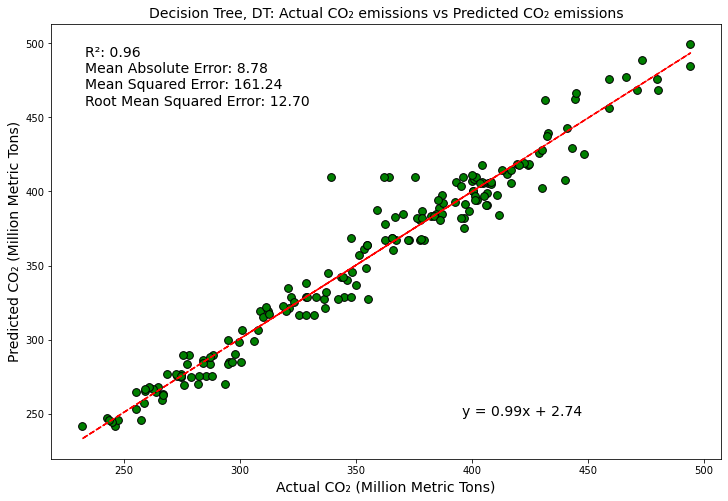

In [3]:


regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train = regressor.predict(X_train)

# Calculate the R-squared score for the training data
r2_train = r2_score(y_train, y_pred_train)
print("R² (Training):", r2_train)


print('###########################################################################')


# Use the model to make predictions on the test data
y_pred = regressor.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the evaluation metrics
print("R²:", format(r2, ".2f"))
print("Mean Absolute Error:", format(mae, ".2f"))
print("Mean Squared Error:", format(mse, ".2f"))
print("Root Mean Squared Error:", format(rmse, ".2f"))


# Calculate statistical parameters
correlation = np.corrcoef(y_test, y_pred)[0, 1]
r_squared = np.square(correlation)


# Perform linear regression to get the line equation
slope, intercept = np.polyfit(y_test, y_pred, 1)

# Add the equation as text on the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'

# Fit a linear regression line
trendline = np.polyfit(y_test, y_pred, 1)
trendline_fn = np.poly1d(trendline)

plt.figure(figsize=(12, 8))  # Specify the width and height in inches

# Plot Actual vs Predicted values with trend line
plt.scatter(y_test, y_pred, color='green', edgecolor='black', s = 60)
plt.plot(y_test, trendline_fn(y_test), color='red', linestyle='--')
plt.xlabel('Actual CO₂ (Million Metric Tons)', fontsize=14)
plt.ylabel('Predicted CO₂ (Million Metric Tons)', fontsize=14)
plt.title('Decision Tree, DT: Actual CO₂ emissions vs Predicted CO₂ emissions', fontsize=14)


# Annotate statistical parameters on the plot
#textstr = f'Correlation coefficient: {correlation:.2f}\nR-squared: {r_squared:.2f}'
textstr = f'R²: {format(r2, ".2f")}\nMean Absolute Error: {format(mae, ".2f")}\nMean Squared Error: {format(mse, ".2f")}\nRoot Mean Squared Error: {format(rmse, ".2f")}'
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, verticalalignment='top', fontsize=14)
plt.text(0.6, 0.2, equation, transform=plt.gcf().transFigure, fontsize=14)
plt.savefig('Decision Tree Actual CO₂ emissions vs Predicted CO₂ emissions.jpg')
plt.show()

